# CitiBike Data Analysis

I am going to be walking through data analysis of citibike data. This file will include all intermediate steps in the process highlighting the decisions necessary to progress in data analysis. Those decisions include data cleaning, trimming, and data cleaning. After we have the date put together, we will start some feature generation and run a predictive model. After I have run a predictive model I will move on to creating a dashboard with my findings. 


## Load the Data

In [2]:
import os

os.chdir('/Users/rebeccahess/Documents/projects/data_analytics/citibike')
print(os.getcwd())


/Users/rebeccahess/Documents/projects/data_analytics/citibike


## File management 

### Unzip the files that I downloaded from the internet:
The way that the files were zipped varies, so I decided to write a recursive function to go deeper into the folders to pull out the csv's. It takes like 2 minutes to run.

In [3]:
import zipfile
import shutil 
import re 

#things i learned from chatgpt to make this recursive code work:
# 1. its os.path.exists()
# 2. os.path.isdir() confirms if the path is a directory
# 3. you need the FULL path of the zip file to extract it
# 4. moved the continue into the if statements for zip and csv files; some folders do not have the citibike name in them

#create a directory to extract all of the data to 
if not os.path.exists('data'): os.makedirs('data')

starting_folder = '/Users/rebeccahess/Documents/projects/data_analytics/citibike'
#change the working directory to the directory where the zip files are located
final_destination = os.path.join(starting_folder, 'data')

#making a function to do some recursion to unzip the files and move the csv files to the final destination
def unzip_stuff(starting_folder, final_destination, original_path=None):
    #storing the original path because after the first iteration, the starting folder will change
    if original_path is None:
        original_path = starting_folder
    print('Starting Folder:', starting_folder)
    print('Final Destination:', final_destination)
    files = os.listdir(starting_folder)

    print('Beginning File Loop')
    for file in files:
        
      
        full_path = os.path.join(starting_folder, file)
        print('File:', file)

       
        if file.endswith('.zip') and not re.search('citibike', file) is None :
            print('Extracting:', file)
            #unzip the file
            try: 
                extract_path = os.path.join(starting_folder, file)
                zipfile.ZipFile(extract_path).extractall(final_destination)

                print('Removing:', file)
                os.remove(extract_path) #remove the zip file after extracting
                
            except zipfile.BadZipFile:
                print('Bad Zip File:', file)
                continue

            
        elif file.endswith('.csv') and not re.search('citibike', file) is None:
            print('Moving:', file)
            
            #move the csv file to the final destination
            if not os.path.exists(os.path.join(final_destination, file)):
                shutil.move(full_path, os.path.join(final_destination, file))
            
        elif os.path.isdir(full_path):
            print('Moving into Folder:', file)
            #else the file is alreays unzipped in a folder 
            unzip_stuff(full_path, final_destination)
            
        #made it all the way to the end of the loop    
        os.chdir(original_path)

unzip_stuff(starting_folder, final_destination)

#check to see if the files were extracted
os.chdir(final_destination)
os.listdir('.')




Starting Folder: /Users/rebeccahess/Documents/projects/data_analytics/citibike
Final Destination: /Users/rebeccahess/Documents/projects/data_analytics/citibike/data
Beginning File Loop
File: 202408-citibike-tripdata
Moving into Folder: 202408-citibike-tripdata
Starting Folder: /Users/rebeccahess/Documents/projects/data_analytics/citibike/202408-citibike-tripdata
Final Destination: /Users/rebeccahess/Documents/projects/data_analytics/citibike/data
Beginning File Loop
File: 202408-citibike-tripdata_3.csv
Moving: 202408-citibike-tripdata_3.csv
File: 202408-citibike-tripdata_2.csv
Moving: 202408-citibike-tripdata_2.csv
File: 202408-citibike-tripdata_1.csv
Moving: 202408-citibike-tripdata_1.csv
File: 202408-citibike-tripdata_5.csv
Moving: 202408-citibike-tripdata_5.csv
File: 202408-citibike-tripdata_4.csv
Moving: 202408-citibike-tripdata_4.csv
File: .DS_Store
File: Untitled-1.ipynb
File: 2023-citibike-tripdata
Moving into Folder: 2023-citibike-tripdata
Starting Folder: /Users/rebeccahess/Do

['201706-citibike-tripdata.csv_1.csv',
 '202405-citibike-tripdata_3.csv',
 '202109-citibike-tripdata_3.csv',
 '202106-citibike-tripdata_2.csv',
 '201908-citibike-tripdata_1.csv',
 '202312-citibike-tripdata_2.csv',
 '._201801-citibike-tripdata.csv',
 '202208-citibike-tripdata_3.csv',
 '202207-citibike-tripdata_2.csv',
 '201710-citibike-tripdata.csv_1.csv',
 '201610-citibike-tripdata_1.csv',
 '202207-citibike-tripdata_3.csv',
 '202301-citibike-tripdata_1.csv',
 '202208-citibike-tripdata_2.csv',
 '201812-citibike-tripdata_1.csv',
 '202312-citibike-tripdata_3.csv',
 '201907-citibike-tripdata_1.csv',
 '201809-citibike-tripdata.csv',
 '202106-citibike-tripdata_3.csv',
 '202405-citibike-tripdata_2.csv',
 '202109-citibike-tripdata_2.csv',
 '._202404-citibike-tripdata.csv',
 '201706-citibike-tripdata.csv_2.csv',
 '._201809-citibike-tripdata.csv',
 '202404-citibike-tripdata.csv',
 '202106-citibike-tripdata_1.csv',
 '202305-citibike-tripdata_4.csv',
 '201801-citibike-tripdata_1.csv',
 '201908-cit

In [4]:

os.chdir(final_destination) # we are in the data folder 

#lets remove the folders so that its doesnt mess us up
for file in os.listdir('.'):
    if os.path.isdir(file):
        shutil.rmtree(file) #remove the folders




### File management complete

### Appending the files and Fixing Column Names

We have to fix the column names while we are appending bacaused we would be left with a bunch of random null values.
It'll be easier to be proactive about it instead of trying to reconcile it afterwards. 


### Need to start with some testing. 

In [5]:
#list the files again to practice loading in a csv file and looking at the data
import pandas as pd

#it doesnt matter which file we open, lets start with the first one 
test_file = os.listdir('.')[0] 

test_df = pd.read_csv(test_file)

print(test_df.info())
print(test_df.describe())
print(test_df.head())

#cool, im going to move on to appending that data together. I will do the data cleaning later after all of the files are appened.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   tripduration             1000000 non-null  int64  
 1   starttime                1000000 non-null  object 
 2   stoptime                 1000000 non-null  object 
 3   start station id         1000000 non-null  int64  
 4   start station name       1000000 non-null  object 
 5   start station latitude   1000000 non-null  float64
 6   start station longitude  1000000 non-null  float64
 7   end station id           1000000 non-null  int64  
 8   end station name         1000000 non-null  object 
 9   end station latitude     1000000 non-null  float64
 10  end station longitude    1000000 non-null  float64
 11  bikeid                   1000000 non-null  int64  
 12  usertype                 1000000 non-null  object 
 13  birth year               884506 non-null   

In [6]:
# I've never done this before in python so I dont know if the most efficient way is to do this in a loop or not. I think it will be easier to do it in a loop so that I can see the progress.
# I will also add a progress bar to see how long it takes to run.
from tqdm import tqdm
import glob
#lets me do an optional argumen tin the append fuction: 
from typing import Optional, Tuple

#lets make a list of all the csv files in the data folder
os.chdir(final_destination)
all_files = glob.glob('*.csv')
print('Number of files:', len(all_files))

#I dont care about the names of the files, I just want to append them together
#you may ask does the file include the date? yes, in the start time and end time columns, so we can ignore file names. 
# i first have to make it a data frame and append to the "master data frame"
#testing with the first 5 files
def append_my_files(all_files, testing: Optional[tuple[int, int]] = None):
    if testing is not None: 
        #testing sould be an a tupple specifying start and stop 
        start = testing[0]
        stop = testing[1]
        all_files = all_files[start:stop]

    for i in range(len(all_files[:5])):
        if i == 0: 
            master_df = pd.read_csv(all_files[i])
            print(f'Master Dataframe has {len(master_df)} rows.')
        else:
            temp_df = pd.read_csv(all_files[i])
            print(f'File {i} has {len(temp_df)} rows.')

            try: 
                master_df = pd.concat([master_df, temp_df], ignore_index=True, sort=False)
                print(f'Master Dataframe updated to {len(master_df)} rows')
                #lets de dupe before the file gets too big <3
                master_df = master_df.drop_duplicates()
                del temp_df
            except: 
                raise AttributeError("Something went wrong!!")
    return master_df

master_df = append_my_files(all_files, (0,5))

master_df.info()
master_df.describe()
#i see we already have an issue with naming conventions - we need to remedy the column names 

Number of files: 291
Master Dataframe has 1000000 rows.


/var/folders/mj/4mjb49y145s6l4jx6ds13c0r0000gn/T/ipykernel_8445/1321139162.py:29: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv(all_files[i])


File 1 has 1000000 rows.
Master Dataframe updated to 2000000 rows


/var/folders/mj/4mjb49y145s6l4jx6ds13c0r0000gn/T/ipykernel_8445/1321139162.py:29: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv(all_files[i])


File 2 has 1000000 rows.
Master Dataframe updated to 3000000 rows


/var/folders/mj/4mjb49y145s6l4jx6ds13c0r0000gn/T/ipykernel_8445/1321139162.py:29: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv(all_files[i])


File 3 has 1000000 rows.
Master Dataframe updated to 4000000 rows
File 4 has 1000000 rows.
Master Dataframe updated to 5000000 rows
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 28 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             float64
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         float64
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           float64
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   float64
 12  usertype                 object 
 13  birth year               float64
 14  gender                   float64
 15  ride_id                  object 
 16  rideable_type            object 
 17  started_at               obj

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,start_lat,start_lng,end_lat,end_lng
count,2.000000e+06,1.999984e+06,2.000000e+06,2.000000e+06,1.999984e+06,2.000000e+06,2.000000e+06,2.000000e+06,1.884506e+06,2.000000e+06,3.000000e+06,3.000000e+06,2.999130e+06,2.999130e+06
mean,1.068729e+03,1.506443e+03,4.073655e+01,-7.398355e+01,1.502682e+03,4.073624e+01,-7.398370e+01,2.618657e+04,1.979890e+03,1.133366e+00,4.074021e+01,-7.397513e+01,4.074019e+01,-7.397547e+01
std,1.449420e+04,1.420294e+03,2.941209e-02,1.891359e-02,1.420278e+03,2.934540e-02,1.897092e-02,7.118145e+03,1.185767e+01,5.763558e-01,3.917983e-02,2.657652e-02,4.570636e-02,5.036013e-02
min,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.406860e+01,1.452900e+04,1.885000e+03,0.000000e+00,4.059937e+01,-7.403878e+01,0.000000e+00,-7.421000e+01
25%,3.910000e+02,3.680000e+02,4.071749e+01,-7.399667e+01,3.660000e+02,4.071745e+01,-7.399705e+01,1.953900e+04,1.970000e+03,1.000000e+00,4.071541e+01,-7.399393e+01,4.071534e+01,-7.399405e+01
50%,6.690000e+02,4.970000e+02,4.073705e+01,-7.398683e+01,4.970000e+02,4.073650e+01,-7.398692e+01,2.684600e+04,1.983000e+03,1.000000e+00,4.073945e+01,-7.398142e+01,4.073989e+01,-7.398192e+01
75%,1.171000e+03,3.173000e+03,4.075646e+01,-7.397371e+01,3.175000e+03,4.075601e+01,-7.397375e+01,3.059400e+04,1.989000e+03,1.000000e+00,4.076323e+01,-7.395927e+01,4.076360e+01,-7.395962e+01
max,4.182314e+06,3.804000e+03,4.088092e+01,-7.388400e+01,3.804000e+03,4.088092e+01,-7.388700e+01,4.002500e+04,2.003000e+03,2.000000e+00,4.089000e+01,-7.384670e+01,4.094000e+01,0.000000e+00


In [ ]:
# trying a different set of files 
append_my_files(all_files, (30, 32))
#aha i finall see in intersection where nulls meet!!

/var/folders/mj/4mjb49y145s6l4jx6ds13c0r0000gn/T/ipykernel_8445/1321139162.py:26: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  master_df = pd.read_csv(all_files[i])


Master Dataframe has 1000000 rows.
File 1 has 573872 rows.
Master Dataframe updated to 1573872 rows


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,211D9837F472C1C2,classic_bike,2022-07-06 18:11:50.566,2022-07-06 18:18:34.784,6 Ave & Canal St,5500.07,Washington St & Barrow St,5847.08,40.722438,-74.005664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4FFB0D6FD9D92275,electric_bike,2022-07-03 23:02:50.580,2022-07-03 23:31:47.420,Van Buren St & Broadway,4568.01,Frost St & Meeker Ave,5371.07,40.692000,-73.926170,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,66002E6013735A7A,classic_bike,2022-07-12 21:38:22.305,2022-07-12 21:43:00.280,E 2 St & 2 Ave,5593.02,E 2 St & Avenue C,5476.03,40.725029,-73.990697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,693D5CC23DB43405,classic_bike,2022-07-26 14:01:02.148,2022-07-26 14:19:59.416,Central Park North & Adam Clayton Powell Blvd,7617.07,Central Park North & Adam Clayton Powell Blvd,7617.07,40.799484,-73.955613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D25A8F6EEBA4D0D4,classic_bike,2022-07-17 11:11:32.390,2022-07-17 11:18:14.532,Broadway & E 19 St,6098.12,W 20 St & 10 Ave,6306.01,40.738661,-73.989873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.732264,-73.998522,311.0,Norfolk St & Broome St,40.717227,-73.988021,15261.0,Subscriber,1983.0,2.0
1573868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.722055,-73.989111,268.0,Howard St & Centre St,40.719105,-73.999733,26471.0,Subscriber,1989.0,1.0
1573869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.764210,-73.969105,3226.0,W 82 St & Central Park West,40.782750,-73.971370,24033.0,Subscriber,1983.0,1.0
1573870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.701485,-73.986569,274.0,Lafayette Ave & Fort Greene Pl,40.686919,-73.976682,25841.0,Subscriber,1974.0,1.0


In [8]:
#So we need to fix column names while we append the files. 
#some options: a dictionary to rename columns, if the files have the same order of variables then we can just rename columns instead of using header 
#lets load two files in different data frames to compare -- after appending everything gets out of order based on the original file 
file_1 = pd.read_csv(all_files[30])
file_2 = pd.read_csv(all_files[31])

/var/folders/mj/4mjb49y145s6l4jx6ds13c0r0000gn/T/ipykernel_8445/3178750555.py:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  file_1 = pd.read_csv(all_files[30])


In [9]:

file_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1000000 non-null  object 
 1   rideable_type       1000000 non-null  object 
 2   started_at          1000000 non-null  object 
 3   ended_at            1000000 non-null  object 
 4   start_station_name  1000000 non-null  object 
 5   start_station_id    1000000 non-null  object 
 6   end_station_name    996332 non-null   object 
 7   end_station_id      996332 non-null   object 
 8   start_lat           1000000 non-null  float64
 9   start_lng           1000000 non-null  float64
 10  end_lat             998292 non-null   float64
 11  end_lng             998292 non-null   float64
 12  member_casual       1000000 non-null  object 
dtypes: float64(4), object(9)
memory usage: 99.2+ MB


In [10]:
file_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573872 entries, 0 to 573871
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Trip Duration            573872 non-null  int64  
 1   Start Time               573872 non-null  object 
 2   Stop Time                573872 non-null  object 
 3   Start Station ID         573872 non-null  int64  
 4   Start Station Name       573872 non-null  object 
 5   Start Station Latitude   573872 non-null  float64
 6   Start Station Longitude  573872 non-null  float64
 7   End Station ID           573872 non-null  int64  
 8   End Station Name         573872 non-null  object 
 9   End Station Latitude     573872 non-null  float64
 10  End Station Longitude    573872 non-null  float64
 11  Bike ID                  573872 non-null  int64  
 12  User Type                567944 non-null  object 
 13  Birth Year               518300 non-null  float64
 14  Gend

In [11]:
# we can make this work we'll just need to clean it 
print(file_2['User Type'].value_counts())
print(file_1['member_casual'].value_counts())


User Type
Subscriber    517425
Customer       50519
Name: count, dtype: int64
member_casual
member    760241
casual    239759
Name: count, dtype: int64


In [12]:
#They are not in order so we'll have to make a translation -- there are also more variables in some files than others 
#for viewing purposes 
#lets make a translation table -- google recommends making a dictionary and doing a mapping.
# I prefer the names to have the underscores so I am starting with file 2. 
# further im going to use fuzzywuzzy matching because why not -- its cute. 

#I believe process will do the dirty work for me 
from fuzzywuzzy import process 
for col in file_2.columns:
    print(col, process.extractOne(col, file_1.columns))

#scratching thisp; the columns are not enough alike 
#just going to make an empty dictionary then replact the ones I know to be true. Im not messing with getting them mistranslated.
col_translation = {}
col_translation['Start Time'] = 'started_at'
col_translation['Stop Time'] = 'ended_at'
col_translation['StartTime'] = 'started_at'
col_translation['StopTime'] = 'ended_at'
col_translation['Start Station ID'] = 'start_station_id'
col_translation['Start Station Name'] = 'start_station_name'
col_translation['End Station ID'] = 'end_station_id'
col_translation['End Station Name'] = 'end_station_name'
col_translation['Start Station Latitude'] = 'start_lat'
col_translation['Start Station Longitude'] = 'start_lng'
col_translation['End Station Latitude'] = 'end_lat'
col_translation['End Station Longitude'] = 'end_lng'
col_translation['User Type']='member_casual'
col_translation['UserType']='member_casual'
#making this lower after the fact 
col_translation = {k.lower():v for k,v in col_translation.items()}
#replacing spaces with underscored for readability 
col_translation = {k.replace(' ', '_'):v for k,v in col_translation.items()}
print(col_translation)
 
#testing on our files 
file_2.columns = file_2.columns.str.lower()
file_2.columns = file_2.columns.str.replace(' ', '_')
file_2_renamed = file_2.rename(columns=col_translation)
#file_2.info()
file_2_renamed.info()

# we would need to drop the extraneous cols 
keep_cols = [v for k,v in col_translation.items()]
print(keep_cols)
file_2_renamed=file_2_renamed[keep_cols]

Trip Duration ('end_station_id', 49)
Start Time ('start_station_name', 64)
Stop Time ('end_station_name', 48)
Start Station ID ('start_station_id', 88)
Start Station Name ('start_station_name', 89)
Start Station Latitude ('start_station_id', 74)
Start Station Longitude ('start_station_id', 72)
End Station ID ('end_station_id', 86)
End Station Name ('end_station_name', 88)
End Station Latitude ('end_lat', 74)
End Station Longitude ('end_station_id', 69)
Bike ID ('start_station_id', 39)
User Type ('rideable_type', 45)
Birth Year ('started_at', 40)
Gender ('ended_at', 57)
{'start_time': 'started_at', 'stop_time': 'ended_at', 'starttime': 'started_at', 'stoptime': 'ended_at', 'start_station_id': 'start_station_id', 'start_station_name': 'start_station_name', 'end_station_id': 'end_station_id', 'end_station_name': 'end_station_name', 'start_station_latitude': 'start_lat', 'start_station_longitude': 'start_lng', 'end_station_latitude': 'end_lat', 'end_station_longitude': 'end_lng', 'user_typ

/Users/rebeccahess/anaconda3/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### Done with Testing 

### Final program for appending the files:

In [ ]:

#putting this all together, we need to update the append files program to do a bit of intermediate file cleaning
#adding a second function to do that things we want
def df_adjust(file, col_translation):
    if col_translation is not None:
            file.columns = file.columns.str.lower()
             #replace any spaces with underscores 
            file.columns = file.columns.str.replace(' ', '_')
            
            #i need to adjust the col_translation depending on the starting variables so we don't accidentally get duplicates again
            col_translation_updtd = {k:v for k,v in col_translation.items() if k in file.columns}
            #testing on our files 
            file_renamed = file.rename(columns=col_translation_updtd)
    else: 
        file_renamed = file 

    #added set function to address the duplicate problem 
    #there are m:1 relationships
    keep_cols = [v for v in set(col_translation.values())]
    try: 
        file_renamed = file_renamed[keep_cols]
    except: 
        not_found = [col  for col in keep_cols if col not in file_renamed.columns]
        joined_columns = '\n    -'.join(not_found)
        raise KeyError(f"New columns not listed in col translation:\n    -{joined_columns}")
    
    file_trimmed= file_renamed.dropna(how = 'any') #reduce
    file_sampled = file_trimmed.sample(frac=0.001) # they are ginormous, lets just keep .1% of the file 
    return file_sampled
    
        

#copying the program here and making changes
def append_my_files(all_files, testing: Optional[tuple[int, int]] = None, col_translation=None):
    if testing is not None: 
        #testing sould be an a tuple specifying start and stop 
        start = testing[0]
        stop = testing[1]
        all_files = all_files[start:stop]

    for i in range(len(all_files)):
        if i == 0: 
            master_df = pd.read_csv(all_files[i], low_memory=False)
            
            master_df = df_adjust(master_df, col_translation) # renaming columns, dropping duplicates, removing na values, and sampling the data set 

            print(f'Master Dataframe has {len(master_df)} rows.')
        else:
            temp_df = pd.read_csv(all_files[i], low_memory=False)
            temp_df = df_adjust(temp_df, col_translation) # renaming columns, dropping duplicates, removing na values, and sampling the data set 
            print(f'File {i} has {len(temp_df)} rows.')

            try: 
                master_df = pd.concat([master_df, temp_df], ignore_index=True, sort=False)
                print(f'Master Dataframe updated to {len(master_df)} rows')
                #lets de dupe before the file gets too big <3
                master_df = master_df.drop_duplicates()
                del temp_df
            except: 
                raise AttributeError("Something went wrong!!")
    #moving into the program because i am checking every time anyway 
    master_df.info()
    master_df.describe()
    master_df.head()
    return master_df





In [14]:
  
master_df = append_my_files(all_files, col_translation= col_translation)

Master Dataframe has 1000 rows.
File 1 has 992 rows.
Master Dataframe updated to 1992 rows
File 2 has 1000 rows.
Master Dataframe updated to 2992 rows
File 3 has 1000 rows.
Master Dataframe updated to 3992 rows
File 4 has 1000 rows.
Master Dataframe updated to 4992 rows
File 5 has 1000 rows.
Master Dataframe updated to 5992 rows
File 6 has 991 rows.
Master Dataframe updated to 6983 rows
File 7 has 994 rows.
Master Dataframe updated to 7977 rows
File 8 has 1000 rows.
Master Dataframe updated to 8977 rows
File 9 has 988 rows.
Master Dataframe updated to 9965 rows
File 10 has 1000 rows.
Master Dataframe updated to 10965 rows
File 11 has 996 rows.
Master Dataframe updated to 11961 rows
File 12 has 1000 rows.
Master Dataframe updated to 12961 rows
File 13 has 1000 rows.
Master Dataframe updated to 13961 rows
File 14 has 205 rows.
Master Dataframe updated to 14166 rows
File 15 has 1000 rows.
Master Dataframe updated to 15166 rows
File 16 has 1877 rows.
Master Dataframe updated to 17043 rows


In [ ]:
#further cleaning 
master_df.head()
master_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252384 entries, 0 to 252383
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   end_station_name    252384 non-null  object 
 1   end_lng             252384 non-null  float64
 2   started_at          252384 non-null  object 
 3   start_lat           252384 non-null  float64
 4   end_station_id      252384 non-null  object 
 5   ended_at            252384 non-null  object 
 6   start_station_id    252384 non-null  object 
 7   end_lat             252384 non-null  float64
 8   start_station_name  252384 non-null  object 
 9   member_casual       252384 non-null  object 
 10  start_lng           252384 non-null  float64
dtypes: float64(4), object(7)
memory usage: 21.2+ MB


In [23]:
os.getcwd()
if not os.path.exists('output'): os.mkdir('output')
master_df.to_csv('output/master_df.csv')

## Data Cleaning

All the above took a while to run, so lets use this opportunity to "reset". I am going to pull in the intermediate file I saved in the previous step. 

In [74]:
#import stuff we need
import os 
import pandas as pd 

In [90]:
os.getcwd()
master_df = pd.read_csv('data/output/master_df.csv', low_memory=False, index_col=0)


In [91]:
master_df.info()
master_df.describe()
master_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 252384 entries, 0 to 252383
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   end_station_name    252384 non-null  object 
 1   end_lng             252384 non-null  float64
 2   started_at          252384 non-null  object 
 3   start_lat           252384 non-null  float64
 4   end_station_id      252384 non-null  object 
 5   ended_at            252384 non-null  object 
 6   start_station_id    252384 non-null  object 
 7   end_lat             252384 non-null  float64
 8   start_station_name  252384 non-null  object 
 9   member_casual       252384 non-null  object 
 10  start_lng           252384 non-null  float64
dtypes: float64(4), object(7)
memory usage: 23.1+ MB


,end_station_name,end_lng,started_at,start_lat,end_station_id,ended_at,start_station_id,end_lat,start_station_name,member_casual,start_lng
0,DeKalb Ave & Hudson Ave,-73.981013,2017-06-09 11:56:59,40.695128,324,2017-06-09 12:15:24,406,40.689888,Hicks St & Montague St,Customer,-73.995951
1,Pershing Square North,-73.977706,2017-06-05 17:32:02,40.703554,519,2017-06-05 18:03:40,315,40.751873,South St & Gouverneur Ln,Subscriber,-74.006702
2,E 39 St & 2 Ave,-73.973442,2017-06-02 16:20:13,40.740964,518,2017-06-02 16:29:07,491,40.747804,E 24 St & Park Ave S,Subscriber,-73.986022
3,E 81 St & 3 Ave,-73.956753,2017-06-14 20:25:24,40.764719,3146,2017-06-14 20:32:28,3376,40.775730,E 65 St & 2 Ave,Subscriber,-73.962221
4,Broadway & W 60 St,-73.981918,2017-06-06 19:01:25,40.744876,499,2017-06-06 19:26:02,446,40.769155,W 24 St & 7 Ave,Subscriber,-73.995299


### Converting Data Types

<Axes: >

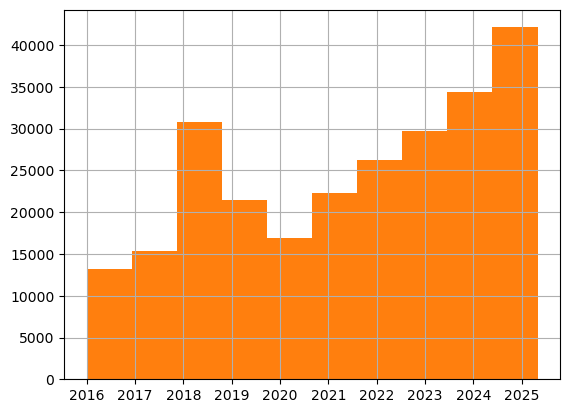

In [92]:
#date time needs to be converted for started_at and ended_at
#using mixed format because the format varies 
df_clean = master_df.copy()
df_clean['started_at']=pd.to_datetime(df_clean['started_at'], format="mixed")
df_clean['started_at'].head()
df_clean['started_at'].hist()

df_clean['ended_at']=pd.to_datetime(df_clean['ended_at'], format="mixed")
df_clean['ended_at'].head()
df_clean['ended_at'].hist()
#the histograms should look exactly the same 

In [93]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252384 entries, 0 to 252383
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   end_station_name    252384 non-null  object        
 1   end_lng             252384 non-null  float64       
 2   started_at          252384 non-null  datetime64[ns]
 3   start_lat           252384 non-null  float64       
 4   end_station_id      252384 non-null  object        
 5   ended_at            252384 non-null  datetime64[ns]
 6   start_station_id    252384 non-null  object        
 7   end_lat             252384 non-null  float64       
 8   start_station_name  252384 non-null  object        
 9   member_casual       252384 non-null  object        
 10  start_lng           252384 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(5)
memory usage: 23.1+ MB


In [ ]:
df_clean['member_casual'].value_counts() # we need to consolidate
df_clean.loc[df_clean['member_casual']=='Subscriber', 'member_casual'] = 'member'
df_clean.loc[df_clean['member_casual']=='Customer', 'member_casual'] = 'casual'

df_clean['member_casual'].value_counts() # validate

member_casual
member    208047
casual     44337
Name: count, dtype: int64

In [95]:
#convert member_casual to categorical? 
df_clean['member_casual_enc'] = df_clean['member_casual'].astype('category')
df_clean['member_casual_enc'] = df_clean['member_casual_enc'].cat.codes
df_clean['member_casual_enc'] = df_clean['member_casual_enc'].astype('int')


### Feature Generation

Early on I am interested in 2 features:
* time elapsed 
* distance traveled 

Maybe even average speed. 

#### <u> Time Elapsed </u>

In [96]:
#generating a time elapsed variable 
df_clean['time_elapsed'] = (df_clean['ended_at'] - df_clean['started_at']).dt.total_seconds() / 60 

,end_station_name,end_lng,started_at,start_lat,end_station_id,ended_at,start_station_id,end_lat,start_station_name,member_casual,start_lng,member_casual_enc,time_elapsed
4586,Albany Ave & Fulton St,-73.938475,2019-08-13 12:41:40.885,40.773407,3044.0,2019-08-28 12:30:48.124,3163.0,40.680011,Central Park West & W 68 St,casual,-73.977825,0,21589.120650
25986,Pike St & E Broadway,-73.992939,2018-01-26 21:07:26.167,40.746745,295,2018-02-05 14:02:21.844,459,40.714067,W 20 St & 11 Ave,casual,-74.007756,0,13974.927950
50732,NYCBS DEPOT - DELANCEY,-73.982331,2018-05-07 15:35:14.091,40.678907,3245,2018-05-24 14:43:00.832,3041,40.716444,Kingston Ave & Herkimer St,casual,-73.941428,0,24427.779017
53521,Pearl St & Hanover Square,-74.009260,2018-03-29 20:55:37.127,40.765909,415,2018-05-08 08:31:14.026,2006,40.704718,Central Park S & 6 Ave,casual,-73.976342,0,56855.614983
72782,Irving Ave & Palmetto St,-73.912700,2020-06-30 19:25:28.860,40.697570,4775.01,2020-07-07 21:42:31.818,4759.02,40.698000,Willoughby Ave & Myrtle Ave,member,-73.930980,1,10217.049300
80746,Pier 40 Dock Station,-74.011980,2020-06-13 16:04:30.785,40.679427,SYS035,2020-08-19 16:25:51.362,4228.02,40.728660,Fulton St & Utica Ave,casual,-73.929891,0,96501.342950
92861,Lincoln Ave & E 134 St,-73.928803,2020-06-28 13:08:57.228,40.705550,7712.06,2020-07-21 18:10:42.558,5025.02,40.808484,Madison St & Forest Ave,casual,-73.902450,0,33421.755500
104963,36 Ave & 10 St,-73.941127,2021-04-20 18:50:51.172,40.753260,6737.03,2021-05-05 23:05:00.096,6471.02,40.761438,21 St & Queens Plaza North,member,-73.943358,1,21854.148733
131435,Clay Ave & Claremont Pkwy,-73.905490,2021-05-02 23:14:10.715,40.834263,8225.05,2021-05-10 15:51:44.369,8126.07,40.839990,Grand Concourse & E 167 St,casual,-73.917641,0,11077.560900
193519,Lenox Ave & W 144 St,-73.936521,2020-10-26 14:25:17.183,40.791976,7910.01,2020-11-06 09:30:05.384,7504.18,40.819783,E 106 St & Lexington Ave,member,-73.945993,1,15544.803350


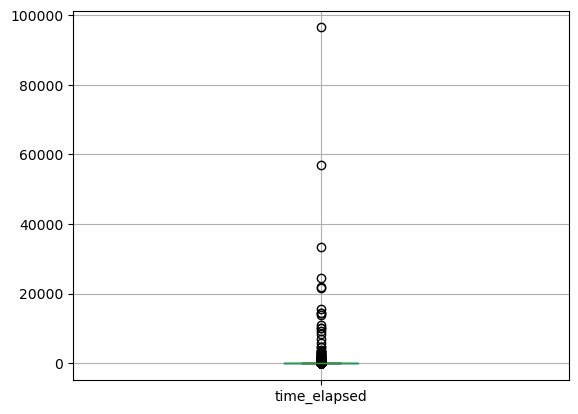

In [97]:
#time elapsed should be in minutes now 
df_clean.boxplot('time_elapsed')

#having points in 100,000 minutes is crazy 
df_clean[df_clean['time_elapsed'] > 10000]

In [98]:
#distance travelled using the euclidean formula 
# sqrt ((x_1 - x_0)**2 + (y_1 - y_0)**2)
# x_1 is ending latitude , x_ 0 is starting latitude 
# y_1 is ending longitude , y_0 is ending longitude

df_clean['distance'] = ((df_clean['end_lat']- df_clean['end_lat'])**2 +(df_clean['end_lng']-df_clean['start_lng'])**2  )**0.5
df_clean['distance'].describe()
#very tiny differences 

count    252384.000000
mean          0.012159
std           0.147691
min           0.000000
25%           0.003950
50%           0.008625
75%           0.016018
max          73.981656
Name: distance, dtype: float64

#### <u> Distance </u>

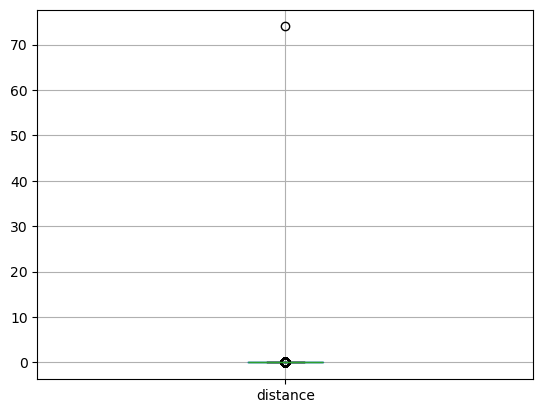

In [99]:
df_clean.boxplot('distance')
#thats a crazy outlier ->let's drop 
df_clean = df_clean[df_clean['distance']<=40]

<Axes: >

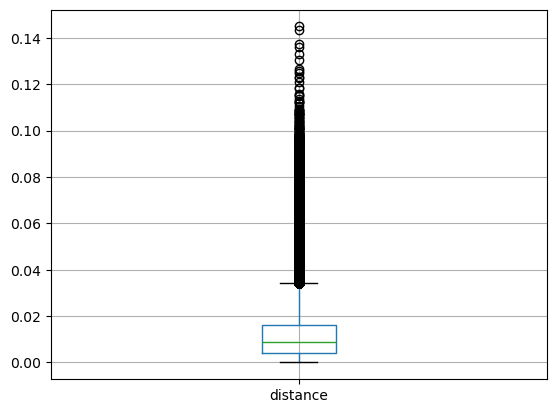

In [100]:
df_clean.boxplot('distance')

#### <u> Average Speed </u>


In [112]:
df_clean['average_speed']= df_clean['distance']/ df_clean['time_elapsed']


<Axes: >

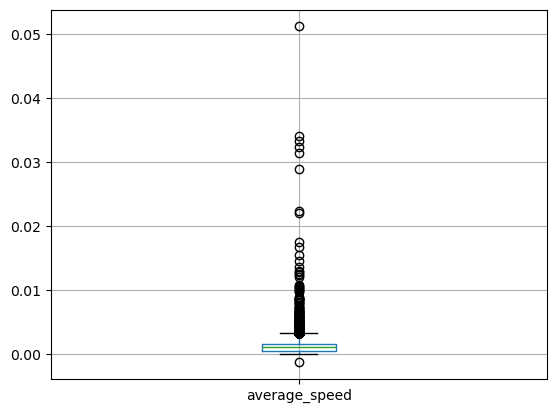

In [111]:
import numpy as np 
df_clean.loc[np.isfinite(df_clean['average_speed']) , 'average_speed'].describe()
#lets just remove the infinite values
df_clean = df_clean[np.isfinite(df_clean['average_speed'])]
df_clean.boxplot('average_speed')

<Axes: >

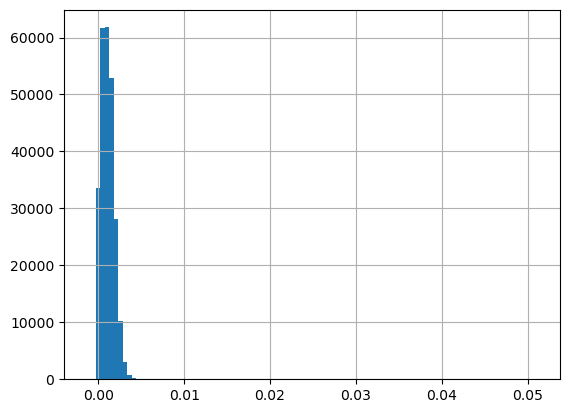

In [ ]:
df_clean['average_speed'].describe()
df_clean['average_speed'].hist(bins=100) # the data is all very similar 


Final Step in feature generation: scaling the attributes based on their distribution. 

<class 'pandas.core.frame.DataFrame'>
Index: 252381 entries, 0 to 252383
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   end_lng            252381 non-null  float64
 1   start_lat          252381 non-null  float64
 2   end_lat            252381 non-null  float64
 3   start_lng          252381 non-null  float64
 4   member_casual_enc  252381 non-null  int64  
 5   time_elapsed       252381 non-null  float64
 6   distance           252381 non-null  float64
 7   average_speed      252381 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 17.3 MB


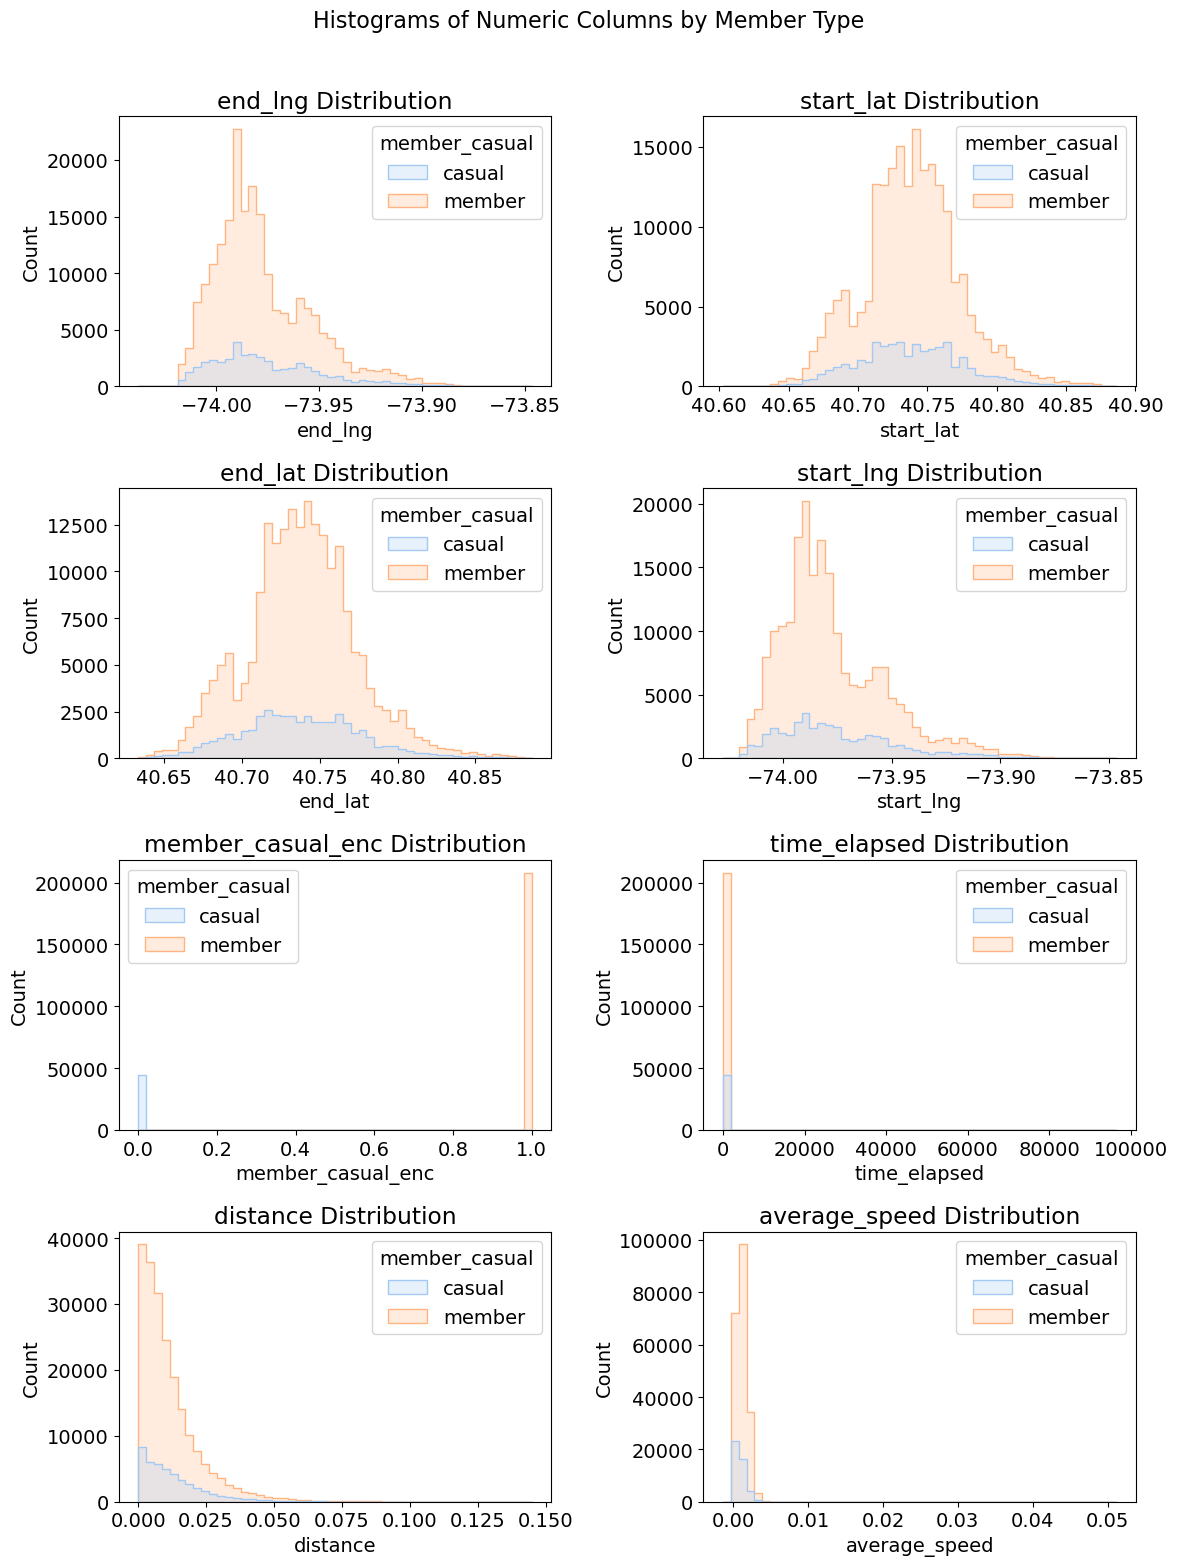

In [128]:
numeric_columns = df_clean[df_clean.select_dtypes(['int', 'float']).columns]
numeric_columns.describe()

import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.pyplot as plt


import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Clean the data
numeric_columns = df_clean[df_clean['member_casual'].notna()]
numeric_columns = numeric_columns.replace([np.inf, -np.inf], np.nan).dropna()

# Get numeric columns
numeric_cols = numeric_columns.select_dtypes(include=np.number).columns
num_plots = len(numeric_cols)

# Determine subplot grid size (e.g., 2 columns)
cols = 2
rows = (num_plots + 1) // cols

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
axes = axes.flatten()  # Flatten in case it's a 2D array

# Plot each histogram
for i, col in enumerate(numeric_cols):
    sns.histplot(data=numeric_columns, x=col, hue='member_casual', bins=50,
                 element='step', stat='count', ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Histograms of Numeric Columns by Member Type', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


### Analysis: 

The general distribution of the two groups are the same. It looks like the casuals are less dense, with a higher standard deviation, but they still mirror the same general distribution. 

In [130]:
# distance is right skewed so lets take the log of that 
df_clean['distance'] = np.log(df_clean['distance']+1)

<Axes: xlabel='distance', ylabel='Count'>

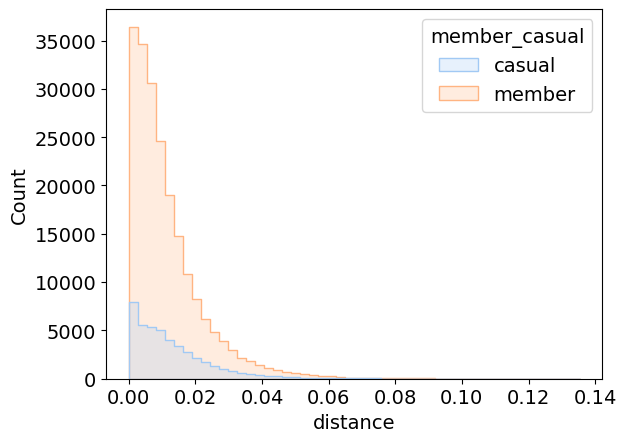

In [ ]:
sns.histplot(data=df_clean, x='distance', hue='member_casual', bins=50,
                 element='step', stat='count')
# not too much different 

Diving Deeper into the Analysis 

As with any good analysis, I'd like to see if we have an strong correlations. 


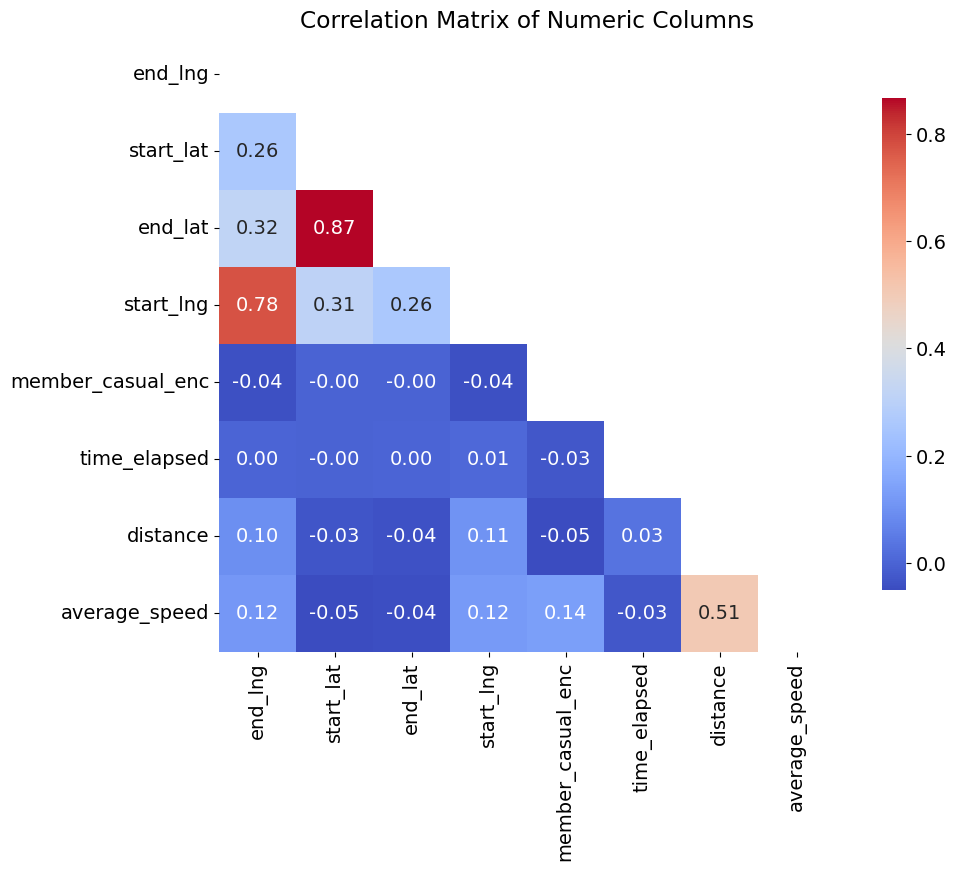

In [133]:
#constructing a correlation matrix to see if there are any relationships between the columns
#select only the numeric columns for the correlation matrix
numeric_columns = df_clean[df_clean.select_dtypes(['int', 'float']).columns]
numeric_columns.describe()
corr_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

Nothing stands out. Any strong correlations look to be from the fact that we generated features. 

## Data Visualization 

It might be interesting to track KPI's through time or by month each year.



In [153]:
df_clean['month'] = df_clean['started_at'].dt.month 
df_clean['year'] = df_clean['started_at'].dt.year 


/var/folders/mj/4mjb49y145s6l4jx6ds13c0r0000gn/T/ipykernel_9158/2025020824.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  month_colors = cm.get_cmap('tab20', 12)


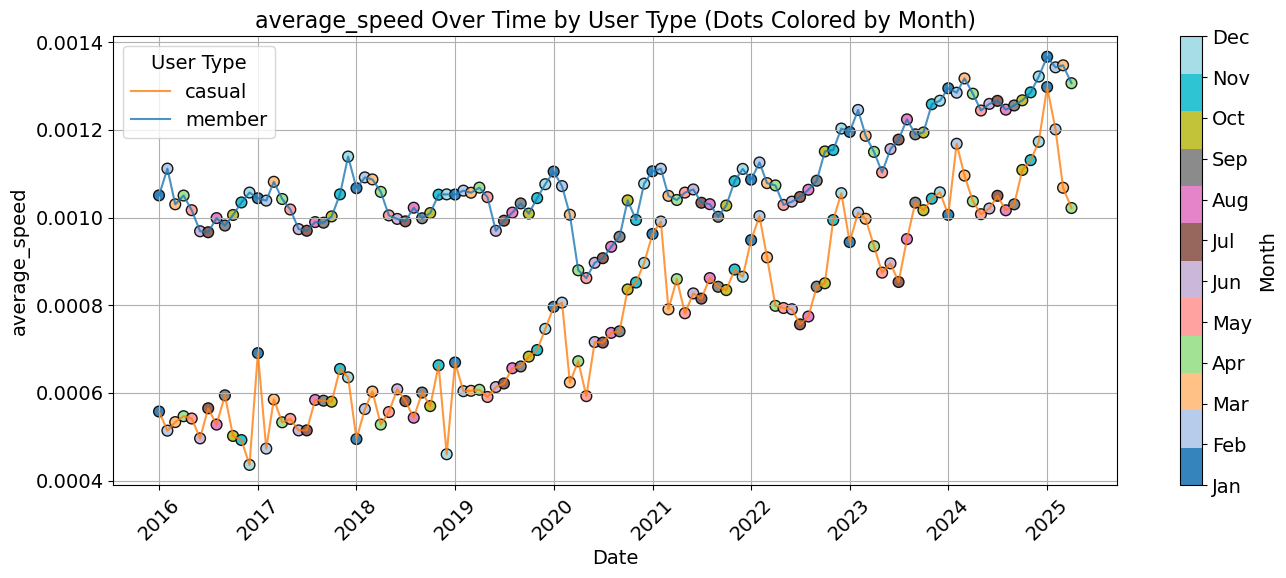

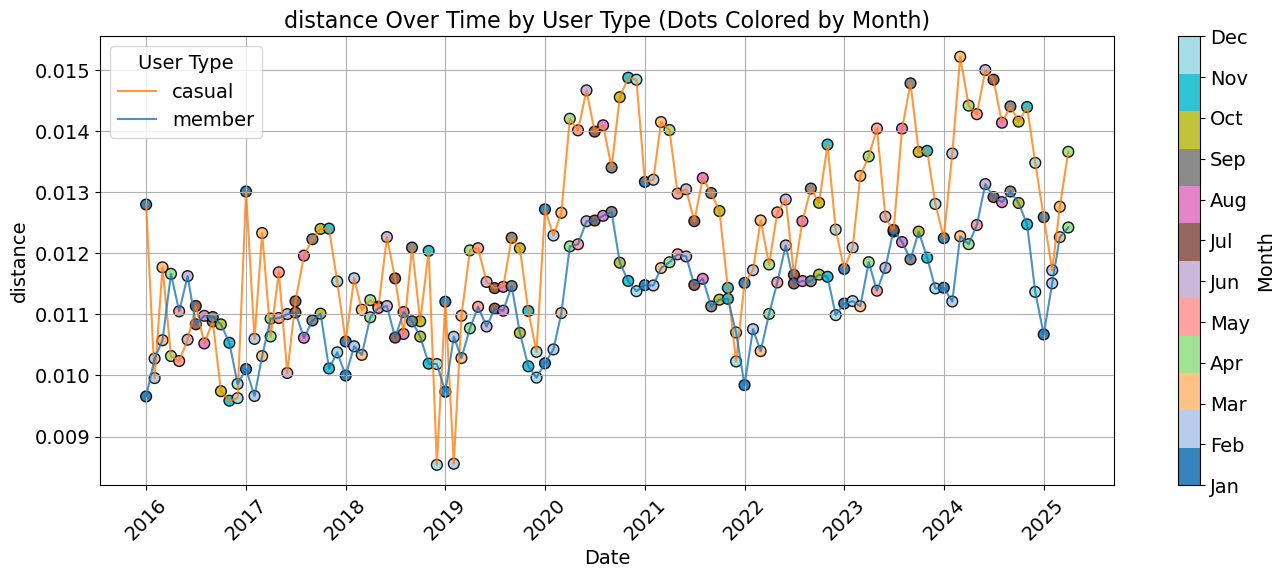

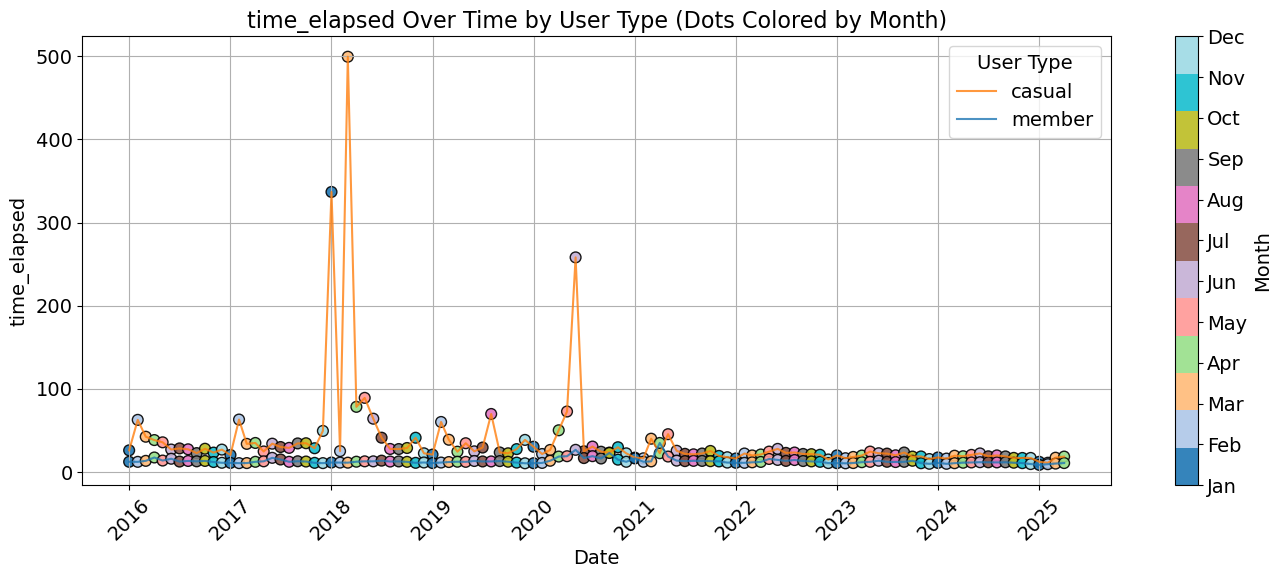

In [189]:

filtered_columns = df_clean.loc[:,['year', 'month','average_speed', 'distance', 'member_casual', 'time_elapsed']]

# Define metrics to plot (exclude 'month' and 'year')
metrics = [col for col in filtered_columns.columns if col not in ['month', 'year', 'member_casual']]
grouped = filtered_columns.groupby(['year', 'member_casual'])[metrics].median().reset_index()

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']


# Convert month to numeric if needed
df_clean['month'] = df_clean['month'].astype(int)

# Create a color map for months
month_colors = cm.get_cmap('tab20', 12)
norm = mcolors.Normalize(vmin=1, vmax=12)

# Loop through each metric
for col in metrics:
    # Group by year, month, member_casual and take the mean for the metric
    grouped = df_clean.groupby(['year', 'month', 'member_casual'])[col].mean().reset_index()

    palette = {
        'member': '#1f77b4',  # blue
        'casual': '#ff7f0e',  # orange
    }

    grouped['date'] = pd.to_datetime(grouped['year'].astype(str) + '-' + grouped['month'].astype(str) + '-01')

    fig, ax = plt.subplots(figsize=(14, 6))

    # Plot a line for each member type
    for member_type in grouped['member_casual'].unique():
        data = grouped[grouped['member_casual'] == member_type]
        color = palette.get(member_type, 'gray')  # fallback in case a type is missing
        ax.plot(data['date'], data[col], label=member_type, color=color, alpha=0.8)


        # Colored scatter points by month
        scatter = ax.scatter(
            data['date'],
            data[col],
            c=data['month'],
            cmap=month_colors,
            norm=norm,
            edgecolors='k',
            s=60,
            alpha=0.9,
            label=None  # Prevent duplicate in legend
        )

    # Add colorbar for month coloring
    cbar = plt.colorbar(scatter, ax=ax, ticks=range(1, 13))
    cbar.ax.set_yticklabels([
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ])
    cbar.set_label('Month')

    # Titles and labels
    ax.set_title(f'{col} Over Time by User Type (Dots Colored by Month)', fontsize=16)
    ax.set_xlabel('Date')
    ax.set_ylabel(col)
    ax.legend(title='User Type')
    ax.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



/var/folders/mj/4mjb49y145s6l4jx6ds13c0r0000gn/T/ipykernel_9158/3695652657.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  month_colors = cm.get_cmap('tab20', 12)  # or 'Set3', 'Paired', etc.


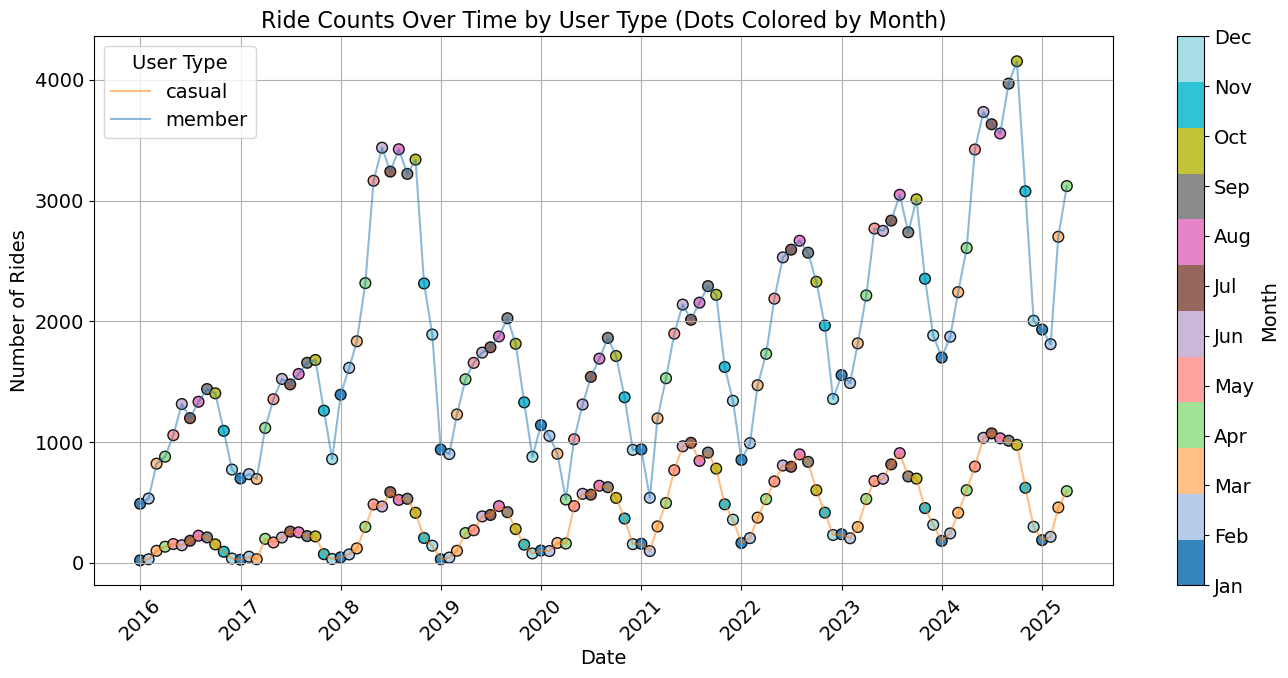

In [193]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Group and count
grouped = df_clean.groupby(['year', 'month', 'member_casual']).size().reset_index(name='count')

# Convert month to int and add a date column
grouped['month'] = grouped['month'].astype(int)
grouped['date'] = pd.to_datetime(grouped['year'].astype(str) + '-' + grouped['month'].astype(str) + '-01')

# Sort by date
grouped = grouped.sort_values('date')

# Create a color map for months (1–12)
month_colors = cm.get_cmap('tab20', 12)  # or 'Set3', 'Paired', etc.
norm = mcolors.Normalize(vmin=1, vmax=12)

# Plot
fig, ax = plt.subplots(figsize=(14, 7))
palette = {
    'member': '#1f77b4',  # blue
    'casual': '#ff7f0e',  # orange
}


# Loop through each member type and plot with month-colored dots
for member_type in grouped['member_casual'].unique():
    color = palette.get(member_type, 'gray')  # fallback in case a type is missing
    data = grouped[grouped['member_casual'] == member_type]
    ax.plot(data['date'], data['count'], label=member_type, linestyle='-', color=color, alpha=0.5)
    
    # Color-coded scatter points by month
    scatter = ax.scatter(
        data['date'],
        data['count'],
        c=data['month'],
        cmap=month_colors,
        norm=norm,
        label=None,  # Prevent double legend
        s=60,
        edgecolors='k',
        alpha=0.9
    )

# Add legend, labels, etc.
cbar = plt.colorbar(scatter, ax=ax, ticks=range(1, 13))
cbar.ax.set_yticklabels([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
cbar.set_label('Month')

ax.set_title('Ride Counts Over Time by User Type (Dots Colored by Month)', fontsize=16)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Rides')
ax.legend(title='User Type')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
